In [1]:
#pip install catboost

In [2]:
!pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import pickle
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [4]:
url = 'https://raw.githubusercontent.com/Gmuhammed/Drinking_Water_Potability/main/drinking_water_potability.csv'
df = pd.read_csv(url)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()
#dataset has only numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isna().sum()
#missing values in ph,Sulfate,Trihalomethanes

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

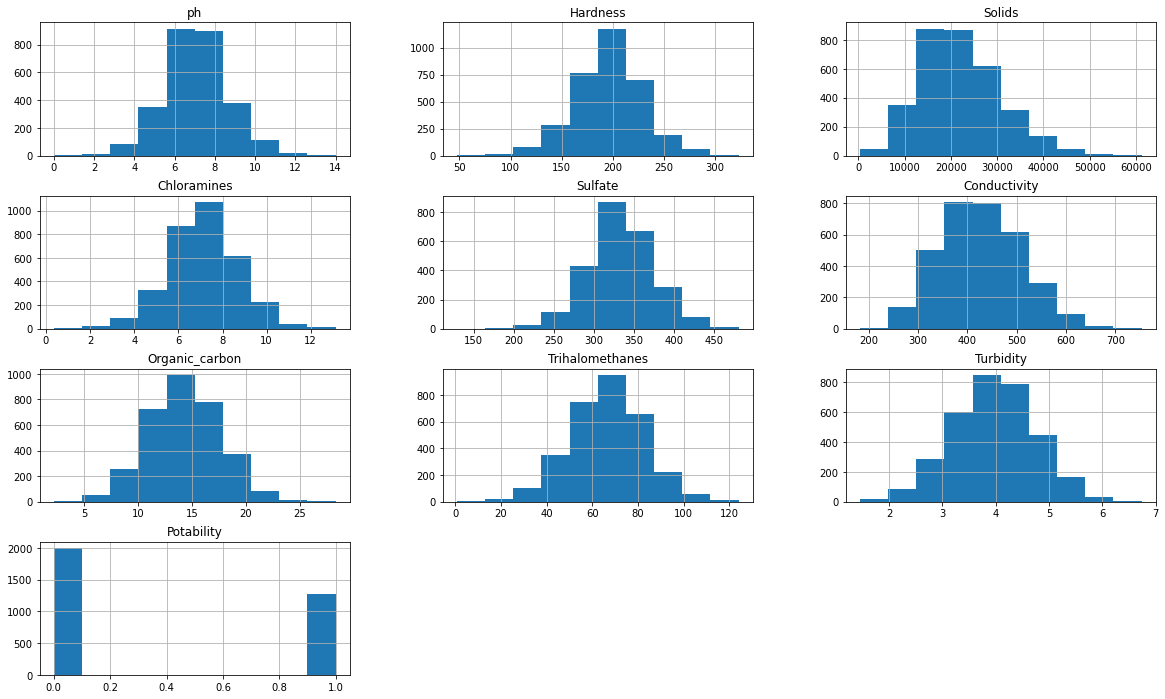

In [8]:
df.hist(figsize=(20,12))

In [9]:
#filling of missing values with mean
df.ph.fillna(df.ph.mean(), inplace=True)
df.Sulfate.fillna(df.Sulfate.mean(), inplace=True)
df.Trihalomethanes.fillna(df.Trihalomethanes.mean(), inplace=True)

In [10]:
y = df.Potability
X = df.drop('Potability', axis=1)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42 )

In [11]:
df.Potability.value_counts()/df.Potability.shape[0]
#checking the class ratio in our original dataframe

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [12]:
y_train.value_counts()/y_train.shape[0], y_test.value_counts()/y_test.shape[0]
#checking the class ratio in our test and train dataframe to ensure the class ratio is not so different from th original df

(0    0.605344
 1    0.394656
 Name: Potability, dtype: float64,
 0    0.628049
 1    0.371951
 Name: Potability, dtype: float64)

In [13]:
#StandardScaler transforms the data such that it has mean as 0 and standard deviation as 1
#same as DictVectorizer
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test =  standardscaler.transform(X_test)

In [14]:
#10 fold cross validation
kf = KFold(n_splits = 10, shuffle=True, random_state=42)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#cross fold validation scores:
cv_score = cross_val_score(lr,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.465,0.067


In [16]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
#cross fold validation scores:
cv_score = cross_val_score(dtc,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1, )
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.530,0.033


In [17]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
cv_score = cross_val_score(gbc,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')


0.626,0.065


In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
cv_score = cross_val_score(rf,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.587,0.077


In [19]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
cv_score = cross_val_score(lgbm,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.630,0.067


In [20]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
cv_score = cross_val_score(abc,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.547,0.074


In [21]:
cbc = CatBoostClassifier(verbose=False)
cbc.fit(X_train, y_train)
cv_score = cross_val_score(cbc,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')

0.639,0.071


**Hyper parameter tuning**

I will tuning the hyper parameter of the followig classifier because they have relatively high f1 score using their default parameter

*   GradientBoostingClassifier
*   LGBMClassifier





In [22]:
#DecisionTreeClassifier GridSearch Hyper parameter tuning

params = {
    'criterion' : ["gini", "entropy"],
    'min_samples_leaf': [ 2, 3,4],
    'max_depth':[None, 5, 10, 15],
    'max_leaf_nodes': [None,5, 10, 15, 20]
}
model = DecisionTreeClassifier(random_state=42 )
dtc_cv = GridSearchCV(model, params, cv=kf, scoring= 'roc_auc', n_jobs=-1)
dtc_cv.fit(X_train,y_train)
print(f'Best params: {dtc_cv.best_params_}')
#Best params: {'criterion': 'gini', 'max_depth': 15,
#'max_leaf_nodes': None, 'min_samples_leaf': 4}

Best params: {'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': None, 'min_samples_leaf': 4}


In [26]:
dtc = DecisionTreeClassifier(min_samples_leaf=4, max_depth=15,random_state=42)
dtc.fit(X_train, y_train)
cv_score = cross_val_score(dtc,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')
#0.546,0.050

0.546,0.050


In [ ]:
#LGBMClassifier GridSearch Hyper parameter tuning
param_test = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.0, 0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgbm2 = LGBMClassifier()
lgbm_cv = GridSearchCV(lgbm2, param_test, cv = kf, scoring='roc_auc',
                  refit=True, verbose= False)
lgbm_cv.fit(X,y)


In [ ]:
print(f'Best params: {lgbm_cv.best_params_}')
#Best params: {'lambda_l1': 0, 'lambda_l2': 1, 'min_data_in_leaf': 100, 
#'num_leaves': 31, 'reg_alpha': 0.1}

In [28]:
lgbm3 = LGBMClassifier(lambda_l2=1, min_data_in_leaf=100, reg_alpha=0.1,
                       num_leaves=31)
lgbm3.fit(X_train, y_train)
cv_score = cross_val_score(lgbm3,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')
#0.596,0.029

0.596,0.029


In [ ]:
param_test = {
              "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt",None ],
              'learning_rate': [0.01,0.05,0.1,1,0.5], 
              'max_depth': [3,4,5],
              'min_samples_leaf': [1,4,5,6],

              'subsample': [0.6,0.7,0.8,1.0],
              'n_estimators': [5,10,15,20,100]

              }

gbc2 = GradientBoostingClassifier(random_state=42)
gbc2_cv = GridSearchCV(lgbm2, param_test, cv = kf, scoring='roc_auc',
                  refit=True, verbose= False)
gbc2_cv.fit(X,y)


In [ ]:
print(f'Best params: {gbc2_cv.best_params_}')
#Best params: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 
#'loss': 'deviance', 'max_depth': 5, 'max_features': 'log2',
#'min_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.6}

In [29]:
gbc3 = GradientBoostingClassifier(random_state=42, criterion='friedman_mse', learning_rate=0.1,
                                 loss='deviance', max_depth=5,max_features='log2',
                                 min_samples_leaf=1,n_estimators=100, subsample=0.6)
gbc3.fit(X_train, y_train)
cv_score = cross_val_score(gbc3,X_test, y_test, cv=kf, scoring= 'roc_auc', n_jobs=-1)
print(f'{np.mean(cv_score):.3f},{np.std(cv_score):.3f}')
#0.607,0.067

0.607,0.067


 Saving and loading the model

In [30]:
output_file = 'Drinking_Water_Potability_model.bin'
with open(output_file,'wb') as f_out:
  pickle.dump((standardscaler,gbc3), f_out)